In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
df = pd.read_csv('/cubes.csv')  # Adjust path if needed
df.head()

<ipython-input-2-fc2f3e4fe72d>:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/cubes.csv')  # Adjust path if needed


,Unnamed: 0,Cube ID,Timestamp,Temperature Layer A,Temperature Layer B,Door,Humidity Layer A,Humidity Layer B
0,0,49,1451606401,NaN,NaN,0.0,NaN,NaN
1,1,95,1451606402,NaN,25.711898671792053°C,NaN,NaN,NaN
2,2,48,1451606402,NaN,NaN,NaN,NaN,NaN
3,3,55,1451606402,NaN,NaN,NaN,NaN,8.594411333817883g/m3
4,4,90,1451606403,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Clean numeric columns with units (°C, g/m3)
def extract_numeric(col):
    return pd.to_numeric(df[col].astype(str).str.extract(r"([-+]?\d*\.\d+|\d+)")[0], errors='coerce')

for col in ['Temperature Layer A', 'Temperature Layer B', 'Humidity Layer A', 'Humidity Layer B']:
    df[col] = extract_numeric(col)

# Handle missing values
df = df.dropna(subset=['Temperature Layer B', 'Humidity Layer B'])  # keep important rows
df = df.fillna(df.mean(numeric_only=True))  # fill the rest with mean

# Drop timestamp if not used
df = df.drop(columns=['Timestamp'], errors='ignore')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cube ID              0 non-null      int64  
 1   Temperature Layer A  0 non-null      float64
 2   Temperature Layer B  0 non-null      float64
 3   Door                 0 non-null      float64
 4   Humidity Layer A     0 non-null      float64
 5   Humidity Layer B     0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 0.0 bytes


In [ ]:
#Check if df is empty before plotting. If empty, skip the plot
if not df.empty:
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
  plt.title("Missing Values Heatmap")
  plt.show()
else:
  print("DataFrame is empty, skipping heatmap plot.")

DataFrame is empty, skipping heatmap plot.


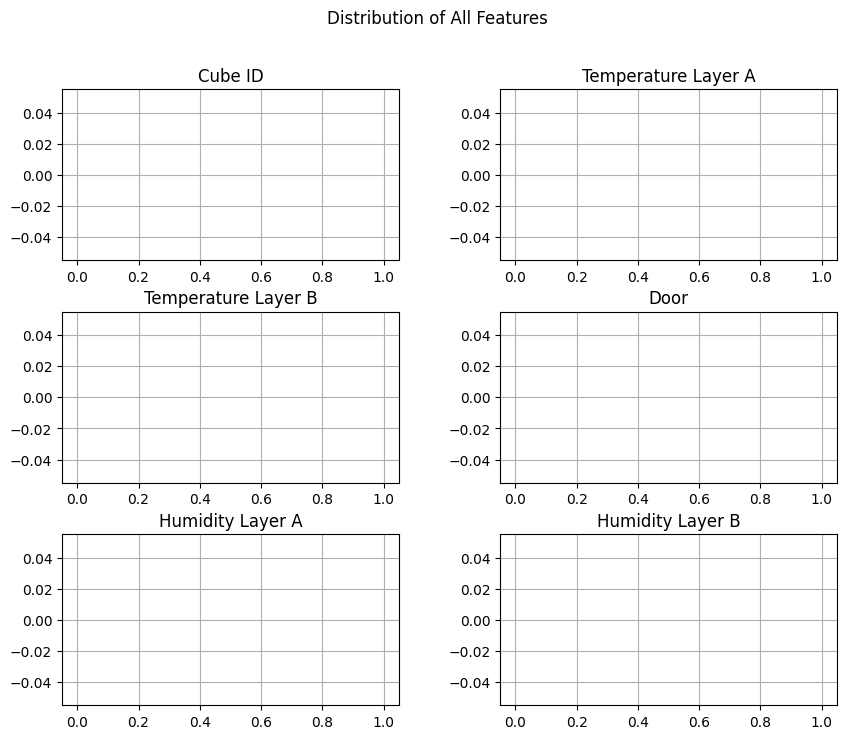

In [ ]:
df.hist(figsize=(10, 8), color='green')
plt.suptitle("Distribution of All Features")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


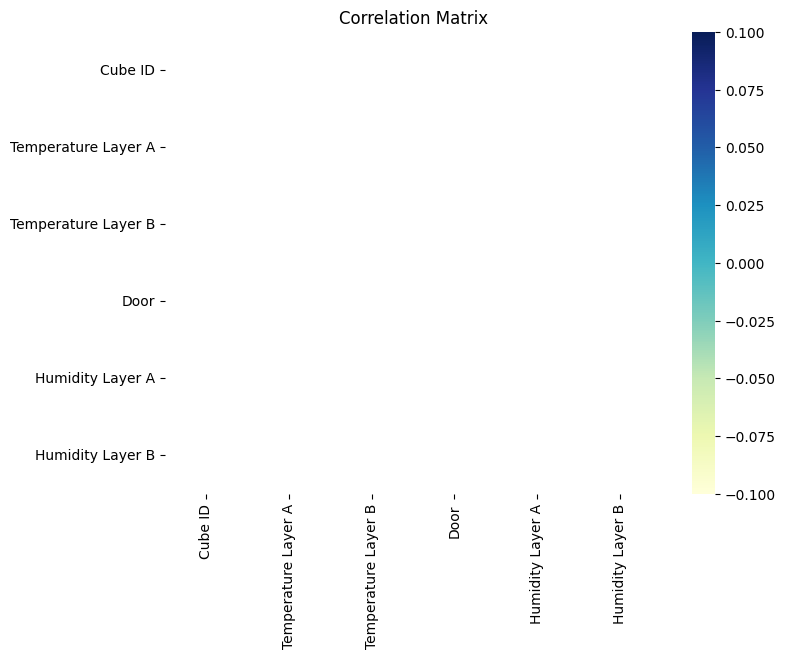

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

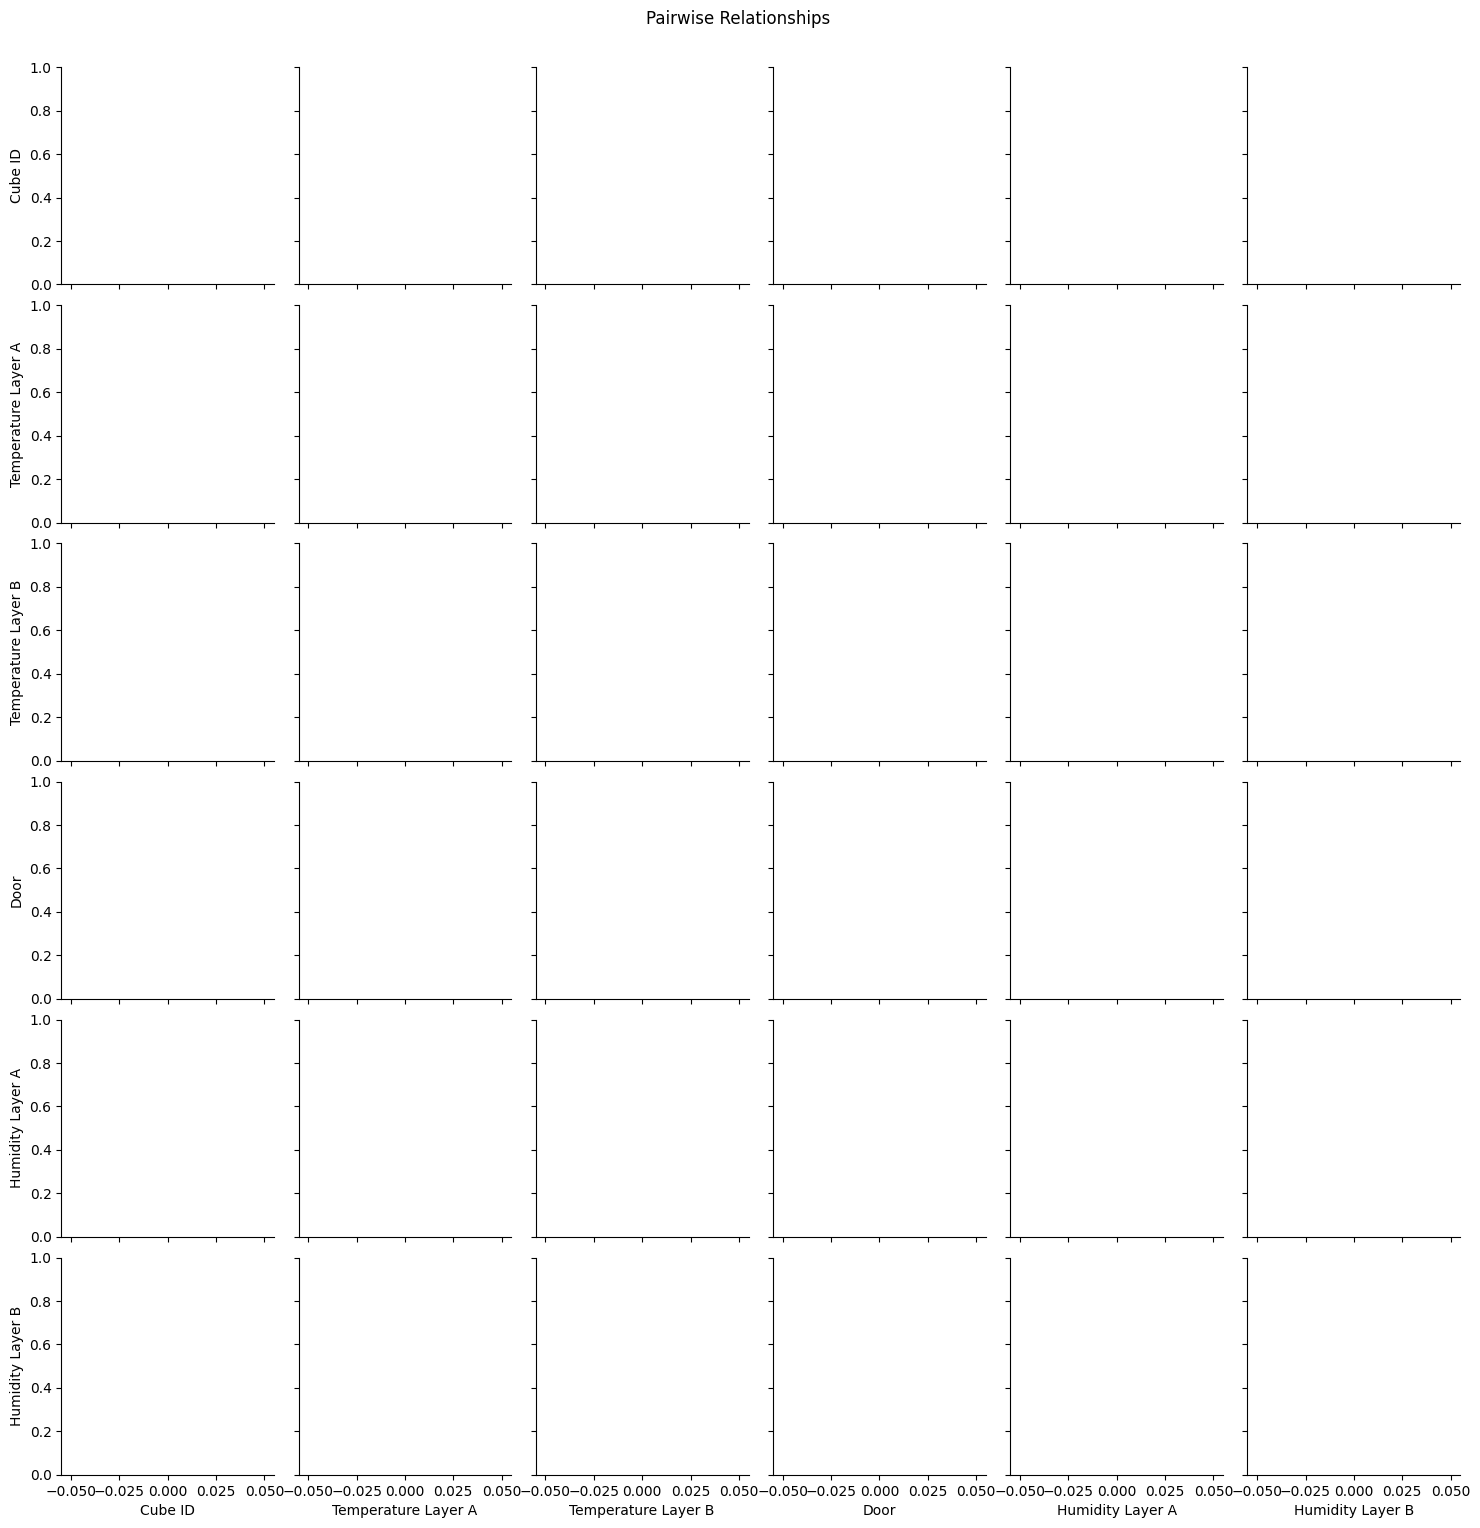

In [ ]:
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

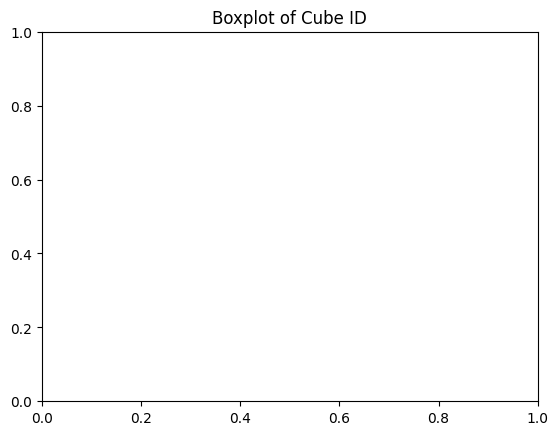

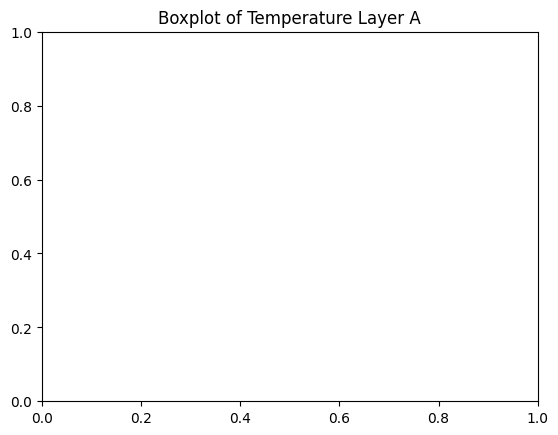

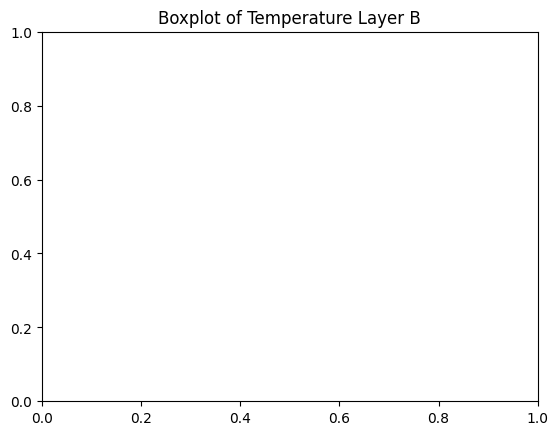

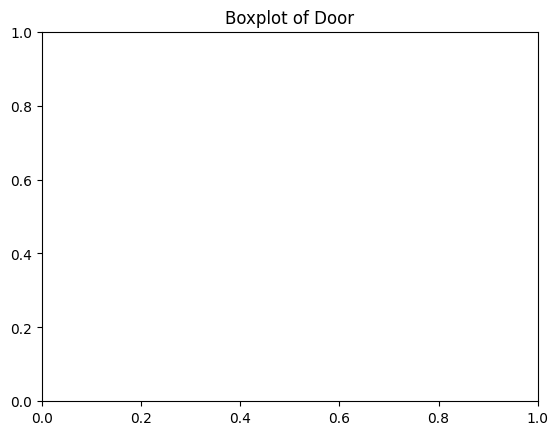

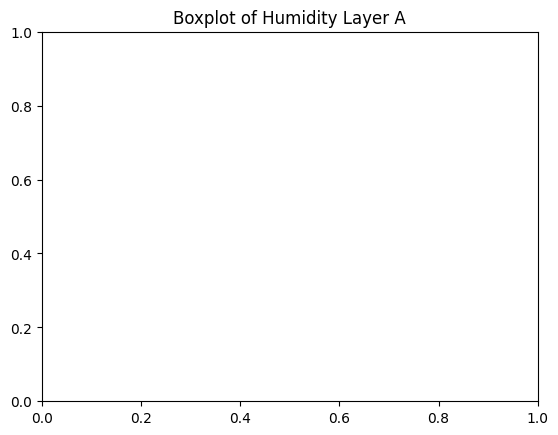

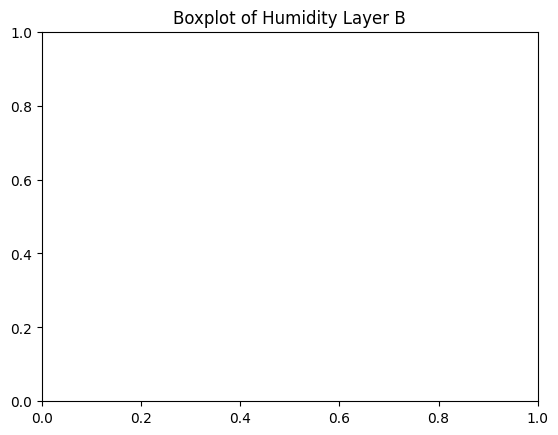

In [ ]:
for col in df.columns:
    plt.figure()
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
X = df.drop('Door', axis=1)
y = df['Door']  # Target

# Check if df is empty before splitting
if df.empty:
    print("DataFrame is empty, skipping train_test_split.")
else:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

DataFrame is empty, skipping train_test_split.


In [ ]:
# ... (previous code) ...

# Split data into training and testing sets
X = df.drop('Door', axis=1)
y = df['Door']  # Target variable

# Ensure df is not empty to avoid errors during splitting
if df.empty:
    print("DataFrame is empty, skipping train_test_split.")
    X_train, X_test, y_train, y_test = None, None, None, None  # Initialize to None
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# Proceed with model training only if X_train and y_train are defined
if X_train is not None and y_train is not None:
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
else:
    print("Model training skipped due to empty or insufficient data.")

# ... (rest of the code) ...

DataFrame is empty, skipping train_test_split.
Model training skipped due to empty or insufficient data.


In [ ]:
# ... (previous code) ...

# Split data into training and testing sets
X = df.drop('Door', axis=1)
y = df['Door']  # Target variable

# Ensure df is not empty to avoid errors during splitting
if df.empty:
    print("DataFrame is empty, skipping train_test_split.")
    X_train, X_test, y_train, y_test = None, None, None, None  # Initialize to None
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# Proceed with model training only if X_train and y_train are defined
if X_train is not None and y_train is not None:
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
else:
    print("Model training skipped due to empty or insufficient data.")
    y_pred = None  # Initialize y_pred to None to avoid NameError

# Calculate metrics only if y_pred is defined
if y_pred is not None:
    print("R² Score:", r2_score(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
else:
    print("Metrics calculation skipped due to missing predictions.")

# ... (rest of the code) ...

DataFrame is empty, skipping train_test_split.
Model training skipped due to empty or insufficient data.
Metrics calculation skipped due to missing predictions.


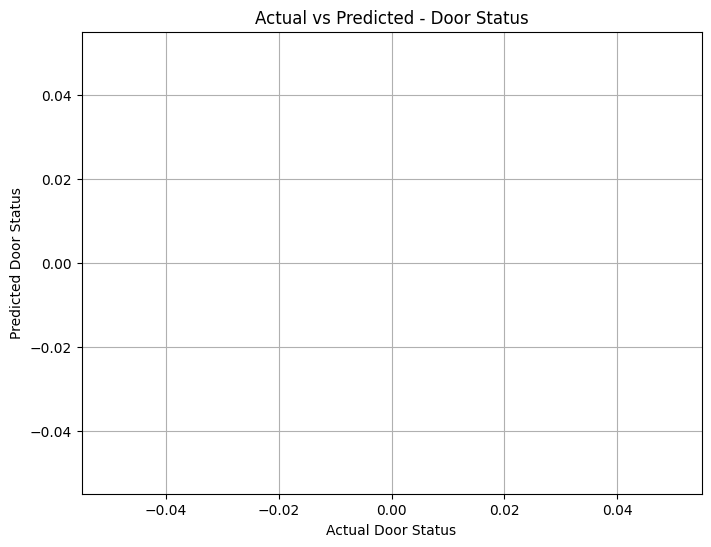

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.xlabel("Actual Door Status")
plt.ylabel("Predicted Door Status")
plt.title("Actual vs Predicted - Door Status")
plt.grid(True)
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'vertical_farming_model.pkl')

['vertical_farming_model.pkl']